# Iris Classification


<img src="https://content.codecademy.com/programs/machine-learning/k-means/iris.svg" alt="Iris">

Image from: https://www.codecademy.com/
***

## Setup 
***

In [326]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

In [327]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

## The Iris Dataset 
***

In [328]:
# Load the iris data set from a URL.
df = pd.read_csv("data sets/iris.csv")

In [329]:
# Have a look at the data.
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [330]:
# Summary statistics.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualise
***

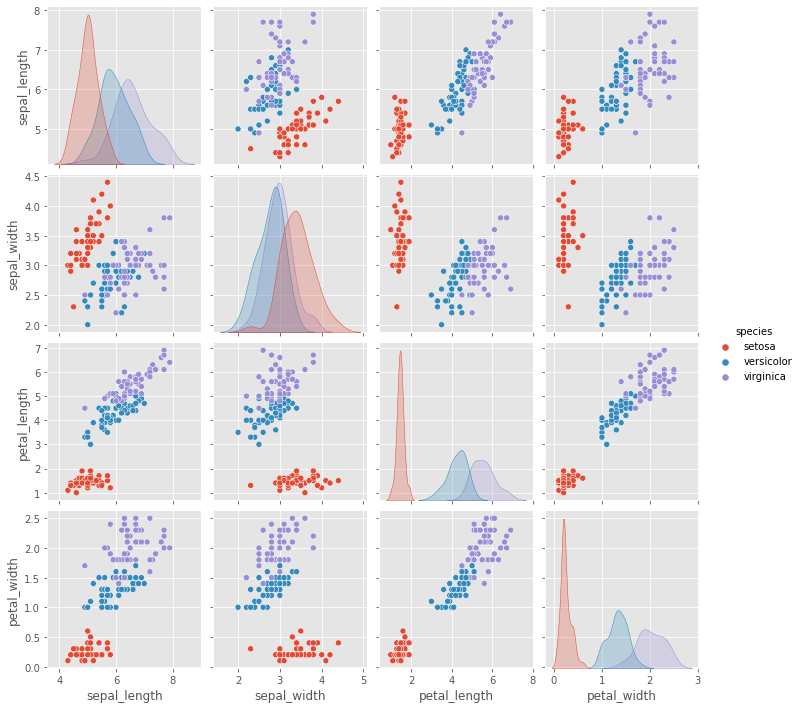

In [331]:
# Scatter plots and kdes.
sns.pairplot(df, hue='species');

#### Two Dimensions
***

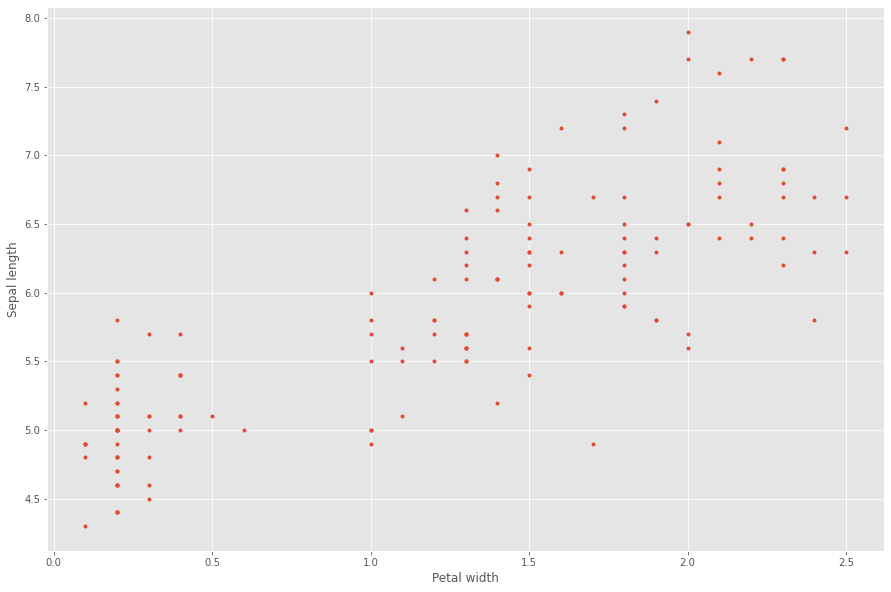

In [332]:
# New figure.
fig, ax = plt.subplots()

# Scatter plot.
ax.plot(df['petal_width'], df['sepal_length'], '.')

# Set axis labels.
ax.set_xlabel('Petal width');
ax.set_ylabel('Sepal length');

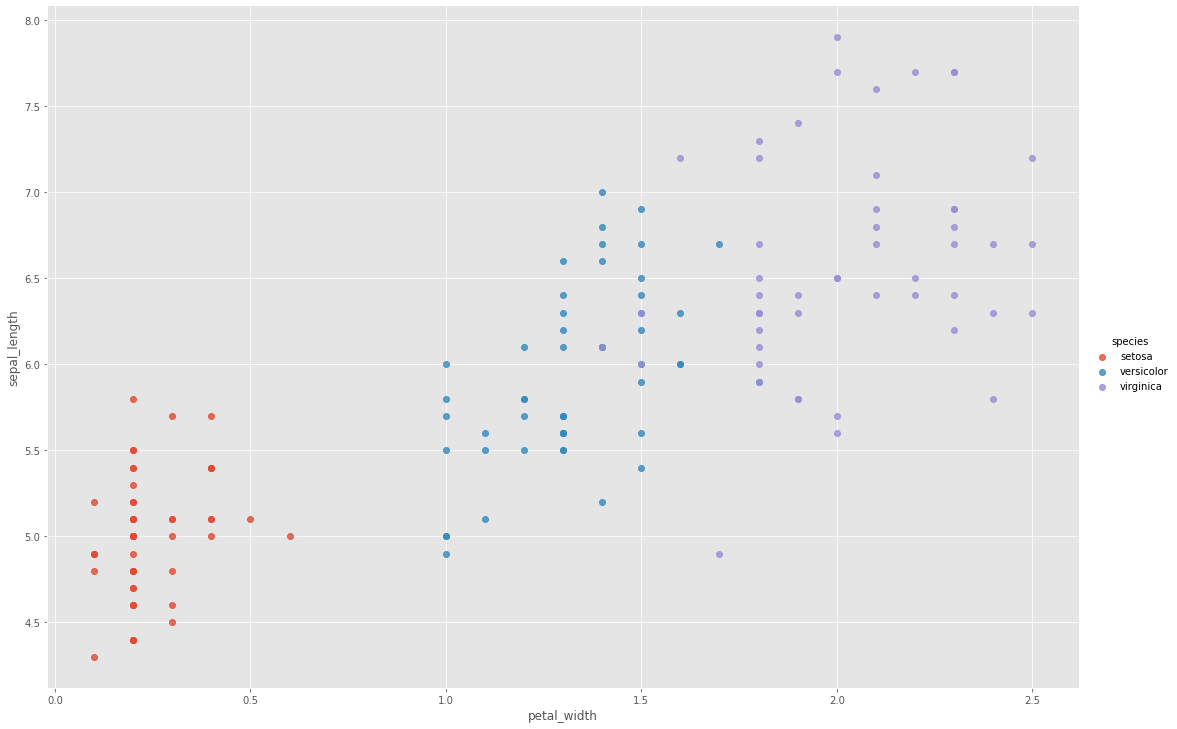

In [333]:
# Seaborn is great for creating complex plots with one command.
sns.lmplot(x="petal_width", y="sepal_length", hue='species', data=df, fit_reg=False, height=10, aspect=1.5);

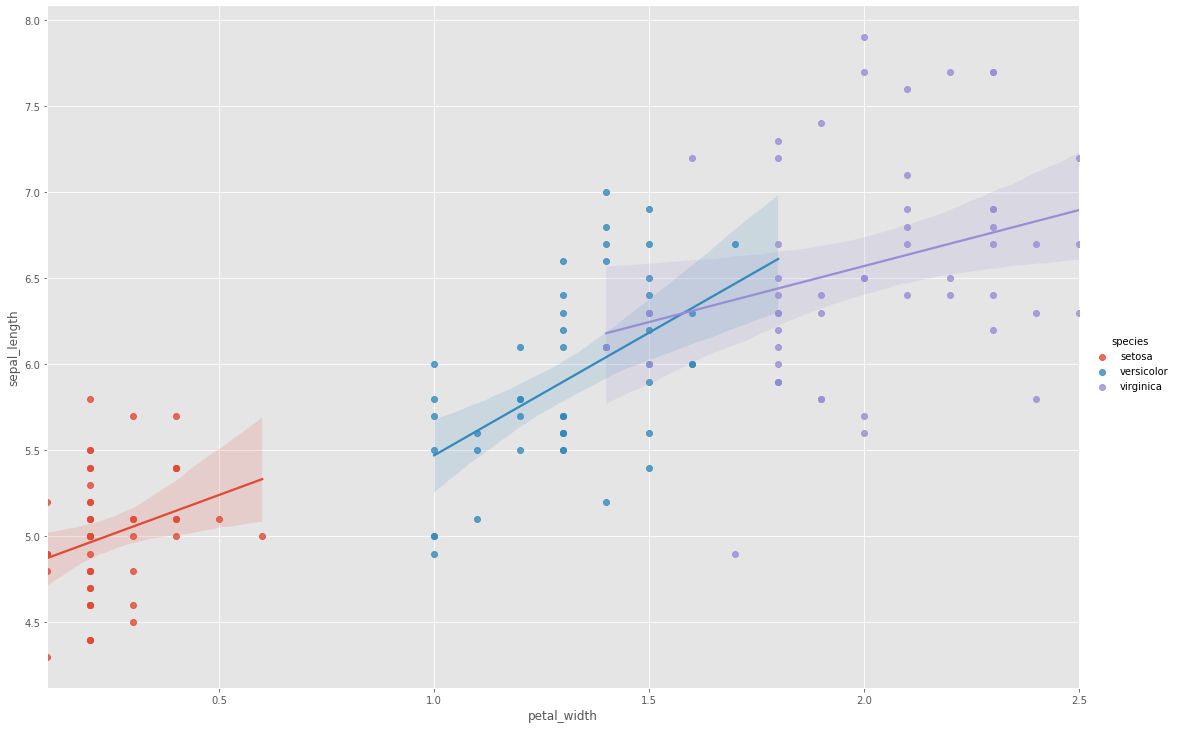

In [334]:
# Seaborn is great for creating complex plots with one command.
sns.lmplot(x="petal_width", y="sepal_length", hue='species', data=df, fit_reg=True, height=10, aspect=1.5);

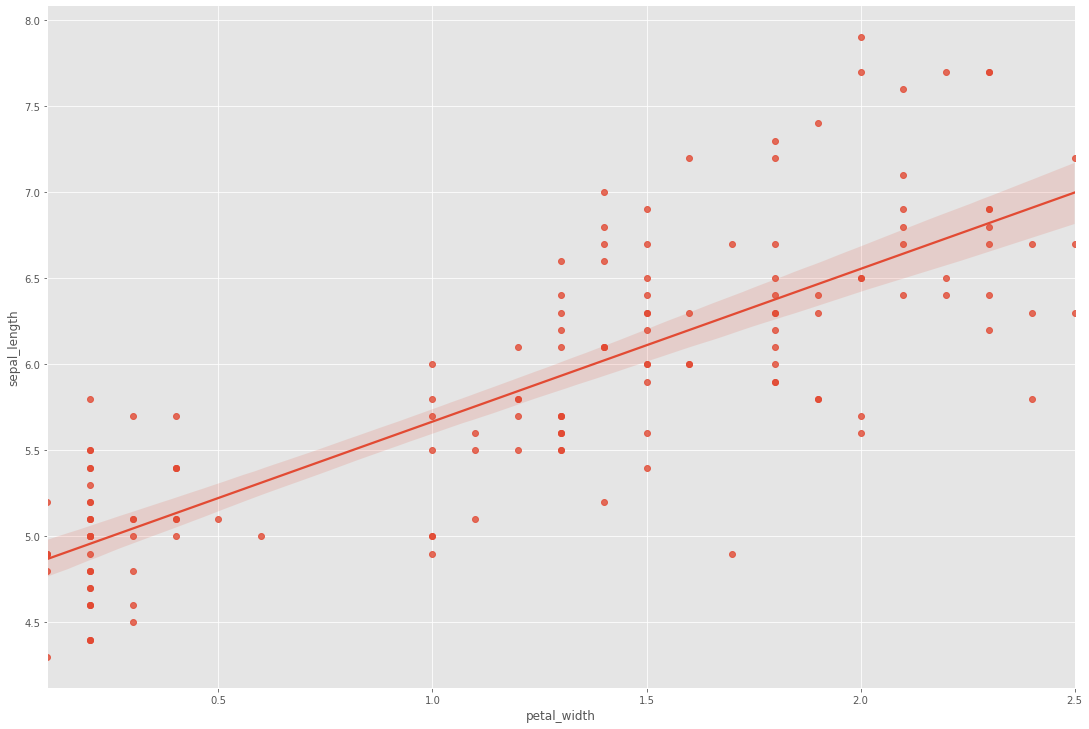

In [335]:
# note: below graph is not in the lectures, ian says it does not describe classification
# Seaborn is great for creating complex plots with one command.
sns.lmplot(x="petal_width", y="sepal_length", data=df, fit_reg=True, height=10, aspect=1.5);

#### Using Pyplot

***

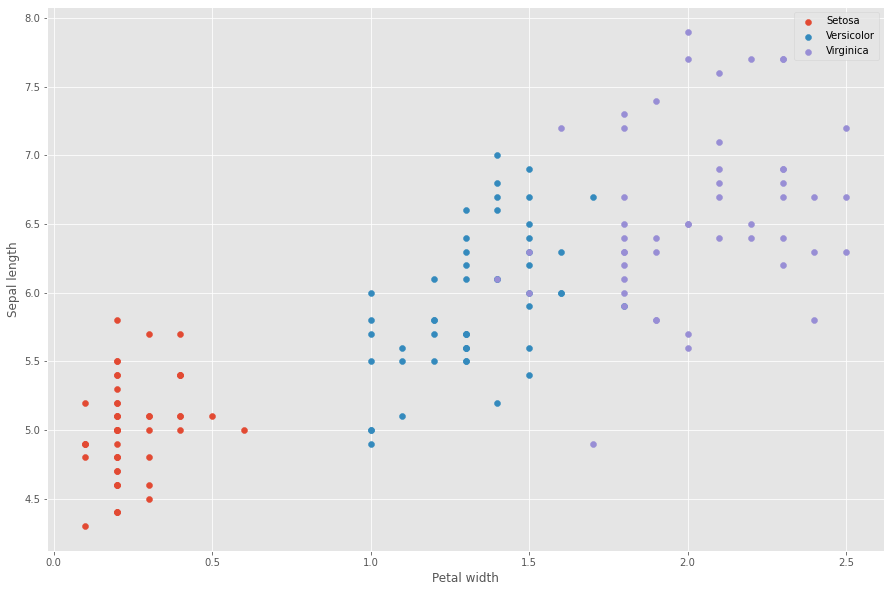

In [336]:
# Segregate the data.
setos = df[df['species'] == 'setosa']
versi = df[df['species'] == 'versicolor']
virgi = df[df['species'] == 'virginica']

# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(setos['petal_width'], setos['sepal_length'], label='Setosa')
ax.scatter(versi['petal_width'], versi['sepal_length'], label='Versicolor')
ax.scatter(virgi['petal_width'], virgi['sepal_length'], label='Virginica')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();


In [337]:
# How the segregation works.
df['species'] == 'virginica'

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: species, Length: 150, dtype: bool

In [338]:
df[df['species'] == 'virginica'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


#### Using Groupby() (in Pandas)

***

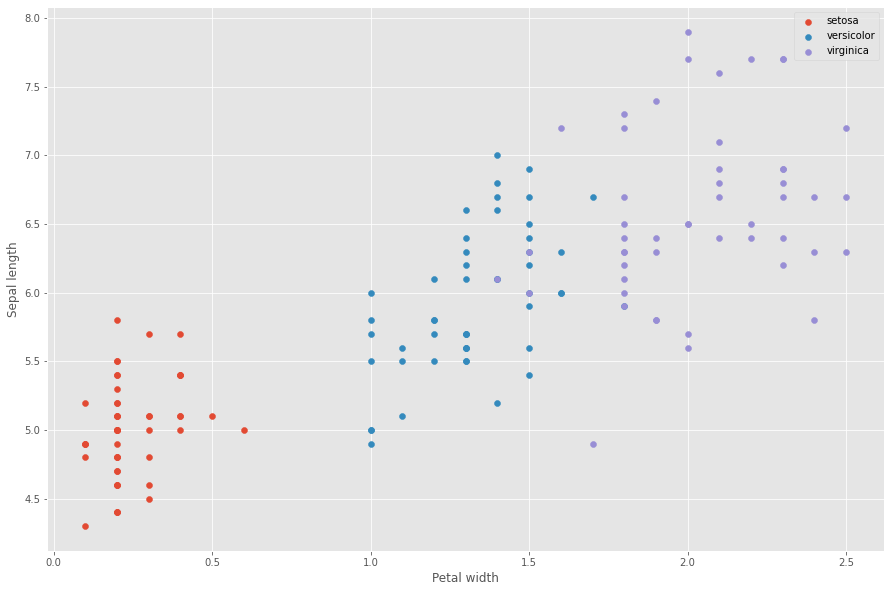

In [339]:
# New plot.
fig, ax = plt.subplots()

# Using pandas groupby().
for species, data in df.groupby('species'):
    ax.scatter(data['petal_width'], data['sepal_length'], label=species)

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

In [340]:
# Group by typically takes a categorical variable.
x = df.groupby('species')
x

In [341]:
# Pivot tables.
x.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [342]:
# Looping through groupby().
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: 'setosa'
j looks like:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


i is: 'versicolor'
j looks like:
    sepal_length  sepal_width  petal_length  petal_width     species
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           6.9          3.1           4.9          1.5  versicolor


i is: 'virginica'
j looks like:
     sepal_length  sepal_width  petal_length  petal_width    species
100           6.3          3.3           6.0          2.5  virginica
101           5.8          2.7           5.1          1.9  virginica
102           7.1          3.0           5.9          2.1  virginica



### Test and Train Split
***

In [343]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [344]:
# Show some training data.
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
28,5.2,3.4,1.4,0.2,setosa
97,6.2,2.9,4.3,1.3,versicolor
89,5.5,2.5,4.0,1.3,versicolor
61,5.9,3.0,4.2,1.5,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [345]:
# The indices of the train array.
train.index

Int64Index([ 28,  97,  89,  61,  59,  44, 117,  76, 116,  36,
            ...
            119,  68,  53,  93, 137,  39, 147,  13, 110,  48],
           dtype='int64', length=112)

In [346]:
# Show some testing data.
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species
26,5.0,3.4,1.6,0.4,setosa
19,5.1,3.8,1.5,0.3,setosa
94,5.6,2.7,4.2,1.3,versicolor
30,4.8,3.1,1.6,0.2,setosa
86,6.7,3.1,4.7,1.5,versicolor


In [347]:
test.index.size

38

#### Two Dimensions: Test Train Split

***

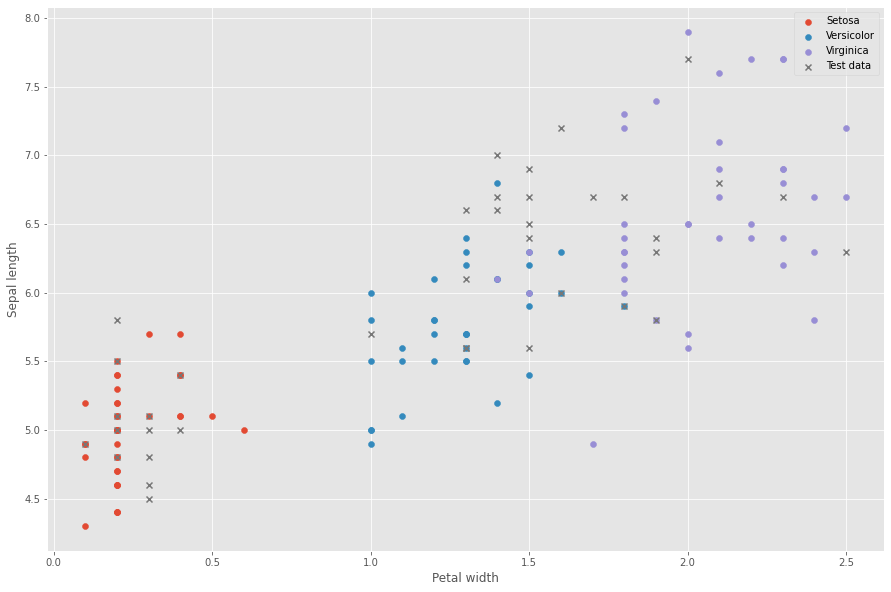

In [348]:
# Segregate the training data.
setos = train[train['species'] == 'setosa']
versi = train[train['species'] == 'versicolor']
virgi = train[train['species'] == 'virginica']

# New plot.
fig, ax = plt.subplots()

# Scatter plots for training data.
ax.scatter(setos['petal_width'], setos['sepal_length'], marker='o', label='Setosa')
ax.scatter(versi['petal_width'], versi['sepal_length'], marker='o', label='Versicolor')
ax.scatter(virgi['petal_width'], virgi['sepal_length'], marker='o', label='Virginica')

# Scatter plot for testing data.
ax.scatter(test['petal_width'], test['sepal_length'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

#### Two Dimensions: Inputs and Outputs

***

In [349]:
# Give the inputs and outputs convenient names.
inputs, outputs = train[['sepal_length', 'petal_width']], train['species']

In [350]:
# Peek at the inputs.
inputs.head()

,sepal_length,petal_width
28,5.2,0.2
97,6.2,1.3
89,5.5,1.3
61,5.9,1.5
59,5.2,1.4


In [351]:
# Peek at the outputs.
outputs.head()

28        setosa
97    versicolor
89    versicolor
61    versicolor
59    versicolor
Name: species, dtype: object

### Two Dimensions: Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

***

In [352]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [353]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['sepal_length', 'petal_width']])
predictions

array(['setosa', 'setosa', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor'], dtype=object)

In [354]:
# Eyeball the misclassifications.
predictions == test['species']

26      True
19      True
94      True
30      True
86     False
71      True
9       True
101     True
145     True
33      True
45      True
58      True
52     False
16      True
108     True
111     True
77     False
50     False
14      True
149     True
54     False
35      True
83      True
6       True
51      True
79      True
46      True
122     True
40      True
112     True
64      True
146     True
66      True
75      True
100     True
129     True
41      True
65      True
Name: species, dtype: bool

In [355]:
# What proportion were correct?
lre.score(test[['sepal_length', 'petal_width']], test['species'])

0.868421052631579

### Two Dimensions: Misclassified

***

In [356]:
# Append a column to the test data frame with the predictions.
test['predicted'] = predictions
test.head()

<ipython-input-356-7f2fd5111565>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


,sepal_length,sepal_width,petal_length,petal_width,species,predicted
26,5.0,3.4,1.6,0.4,setosa,setosa
19,5.1,3.8,1.5,0.3,setosa,setosa
94,5.6,2.7,4.2,1.3,versicolor,versicolor
30,4.8,3.1,1.6,0.2,setosa,setosa
86,6.7,3.1,4.7,1.5,versicolor,virginica


In [357]:
# Show the misclassified data.
misclass = test[test['predicted'] != test['species']]
misclass

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
86,6.7,3.1,4.7,1.5,versicolor,virginica
52,6.9,3.1,4.9,1.5,versicolor,virginica
77,6.7,3.0,5.0,1.7,versicolor,virginica
50,7.0,3.2,4.7,1.4,versicolor,virginica
54,6.5,2.8,4.6,1.5,versicolor,virginica


In [358]:
# Eyeball the descriptive statistics for the species.
train.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,4.994595,3.410811,1.483784,0.237838
versicolor,5.774286,2.697143,4.180000,1.288571
virginica,6.590000,3.005000,5.552500,2.037500


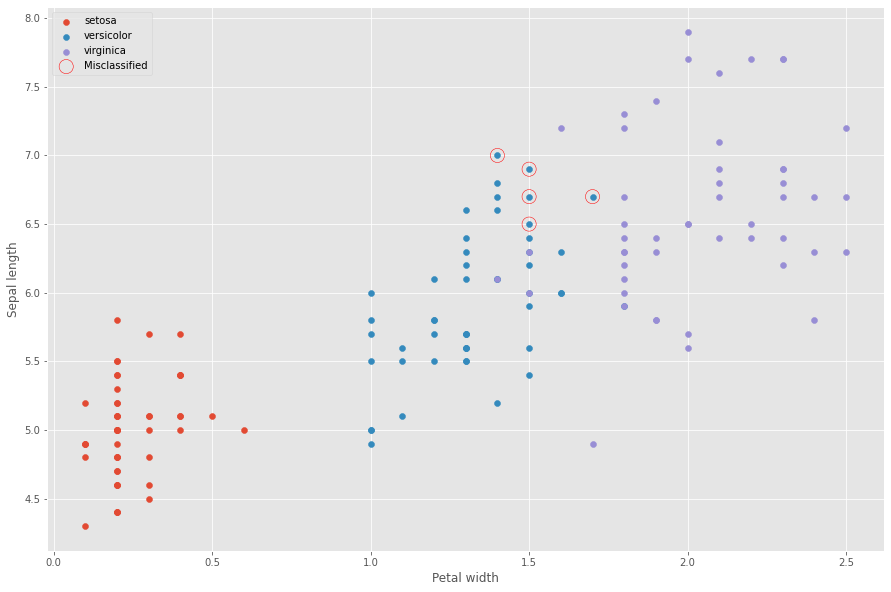

In [359]:
# New plot.
fig, ax = plt.subplots()

# Plot the training data
for species, data in df.groupby('species'):
    ax.scatter(data['petal_width'], data['sepal_length'], label=species)
    
# Plot misclassified.
ax.scatter(misclass['petal_width'], misclass['sepal_length'], s=200, facecolor='none', edgecolor='r', label='Misclassified')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

### Separating Setosa
From Wikipedia:

ℓ=logbp1−p=β0+β1x1+β2x2        
LaTeX....good to add to project notebook if get a chance...the background maths to your coding

***

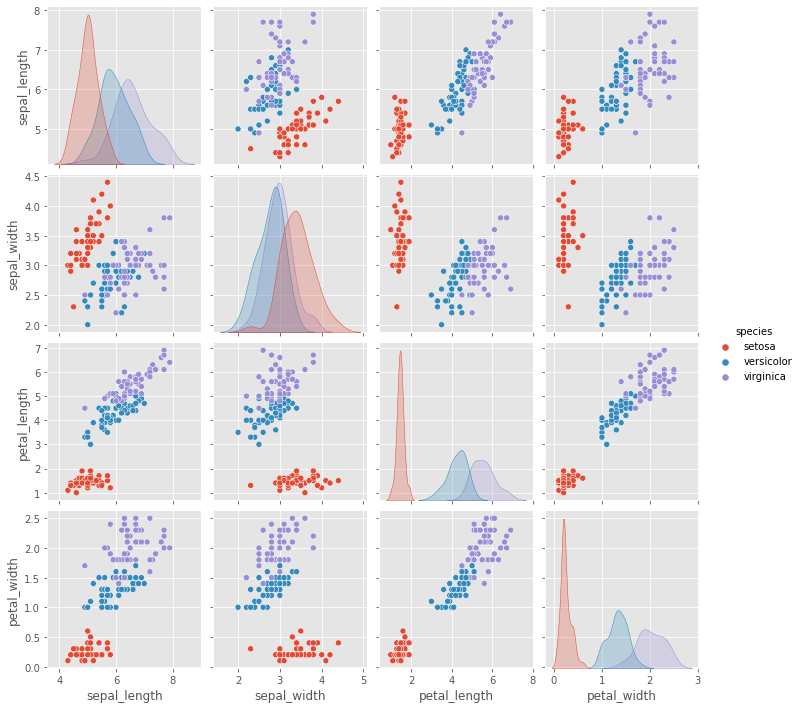

In [360]:
# Another look at this plot.
sns.pairplot(df, hue='species');

In [361]:
# Give the inputs and outputs convenient names.
inputs = train[['sepal_length', 'petal_width']]

# Set 'versicolor' and 'virginica' to 'other'.
outputs = train['species'].apply(lambda x: x if x == 'setosa' else 'other')

# Eyeball outputs
outputs.unique()

array(['setosa', 'other'], dtype=object)

In [362]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [363]:
actual = test['species'].apply(lambda x: x if x == 'setosa' else 'other')

# What proportion were correct?
lre.score(test[['sepal_length', 'petal_width']], actual)

1.0

### Using All Possible Inputs

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

***

In [364]:
# Load the iris data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [365]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [366]:
# Use all four possible inputs.
inputs, outputs = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['species']

In [367]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [368]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
predictions

array(['setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'versicolor',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'setosa', 'versicolor'], dtype=object)

In [369]:
# Eyeball the misclassifications.
(predictions == test['species']).value_counts()

True     35
False     3
Name: species, dtype: int64

In [370]:
# What proportion were correct?
lre.score(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], test['species'])

0.9210526315789473

### k  Nearest Neighbours Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

***

In [371]:
# Load the iris data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [372]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [373]:
# Use all four possible inputs.
inputs, outputs = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['species']

In [374]:
# Classifier.
knn = nei.KNeighborsClassifier()

In [375]:
# Fit.
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [376]:
# Test.
knn.score(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], test['species'])
0.9473684210526315

0.9473684210526315

In [377]:
# Predict.
predictions = lre.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
(predictions == test['species']).value_counts()

True     36
False     2
Name: species, dtype: int64

In [378]:
# The score is just the accuracy in this case.
(predictions == test['species']).value_counts(normalize=True)

True     0.947368
False    0.052632
Name: species, dtype: float64

### Cross validation

https://scikit-learn.org/stable/modules/cross_validation.html

***

In [379]:
# split into 4 equal test sets?? 
knn = nei.KNeighborsClassifier()
scores = mod.cross_val_score(knn, df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df['species'])
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [380]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.9733333333333334 	 Standard Deviation: 0.02494438257849294


In [381]:
lre = lm.LogisticRegression(random_state=0)
scores = mod.cross_val_score(lre, df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df['species'])
scores

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [382]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.9733333333333334 	 Standard Deviation: 0.02494438257849294


***

well worth your while learning and reading about logistic regression, not possible to get it all this semester, not possible to understand all of scikit learn ...timeline maybe 5 years
## End